In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('To_Use_data.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34,37,20.879744,82.002744,6.502985,202.935536,rice
1,78,21,20,21.770462,80.319644,7.038096,226.655537,rice
2,92,31,34,23.004459,82.320763,7.840207,263.964248,rice
3,98,38,45,26.491096,80.158363,6.980401,242.864034,rice
4,79,53,43,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df.shape

(2200, 8)

In [5]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
df['label'].value_counts()

mango          100
coffee         100
pomegranate    100
blackgram      100
grapes         100
kidneybeans    100
jute           100
orange         100
muskmelon      100
coconut        100
cotton         100
mothbeans      100
watermelon     100
banana         100
pigeonpeas     100
mungbean       100
chickpea       100
lentil         100
apple          100
rice           100
papaya         100
maize          100
Name: label, dtype: int64

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
labels_map = {labels[i]:i+1 for i in range(len(labels))}
labels_map

{'rice': 1,
 'maize': 2,
 'chickpea': 3,
 'kidneybeans': 4,
 'pigeonpeas': 5,
 'mothbeans': 6,
 'mungbean': 7,
 'blackgram': 8,
 'lentil': 9,
 'pomegranate': 10,
 'banana': 11,
 'mango': 12,
 'grapes': 13,
 'watermelon': 14,
 'muskmelon': 15,
 'apple': 16,
 'orange': 17,
 'papaya': 18,
 'coconut': 19,
 'cotton': 20,
 'jute': 21,
 'coffee': 22}

In [9]:
dummm = df.copy()
df['label'] = df['label'].map(labels_map)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34,37,20.879744,82.002744,6.502985,202.935536,1
1,78,21,20,21.770462,80.319644,7.038096,226.655537,1
2,92,31,34,23.004459,82.320763,7.840207,263.964248,1
3,98,38,45,26.491096,80.158363,6.980401,242.864034,1
4,79,53,43,20.130175,81.604873,7.628473,262.717340,1


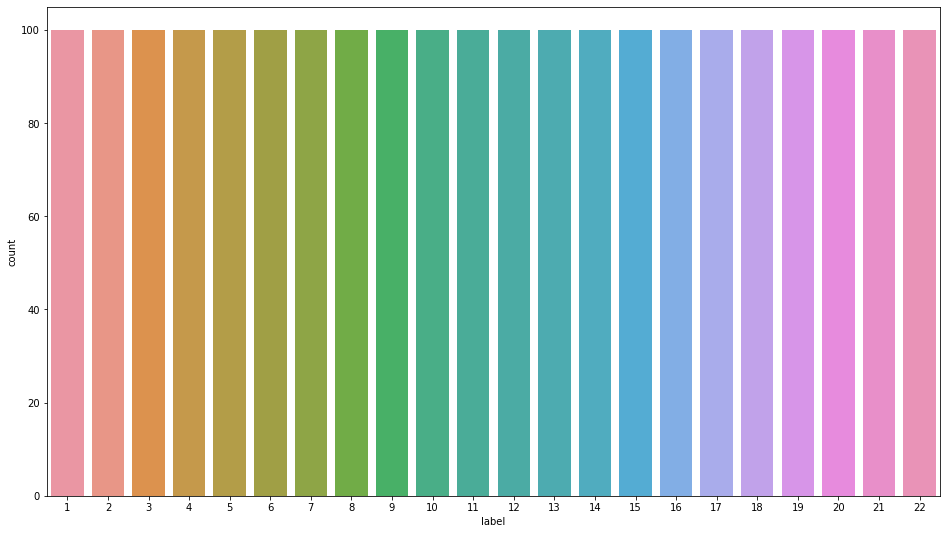

In [10]:
sn.set_palette('Set3')
plt.figure(figsize=(16,9))
sn.countplot(data=df,x = 'label')

In [11]:
import scipy.stats as stats

In [12]:
def visualise(df,col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color = 'pink')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sn.boxplot(df[col],color = 'pink')
    
    plt.show()

 Statistical plots for : N is shown ↓


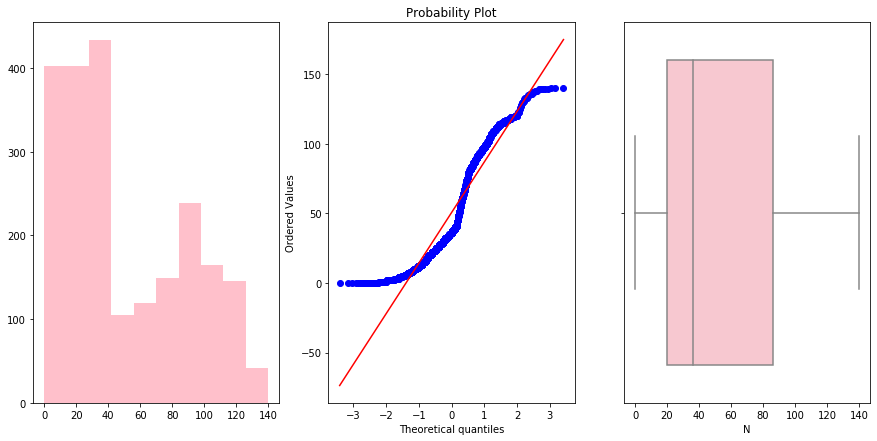

------------------------------------------------------------
 Statistical plots for : P is shown ↓


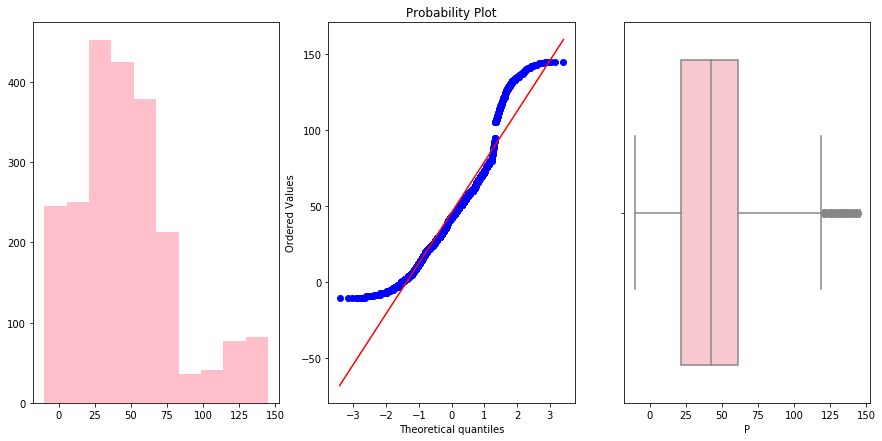

------------------------------------------------------------
 Statistical plots for : K is shown ↓


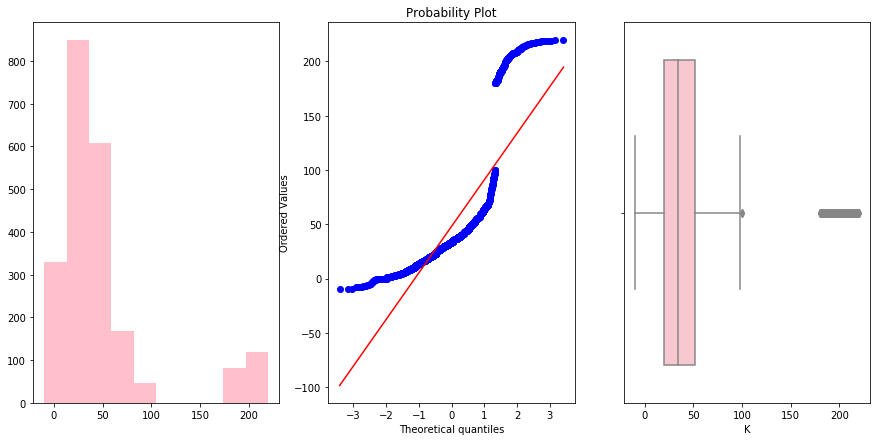

------------------------------------------------------------
 Statistical plots for : temperature is shown ↓


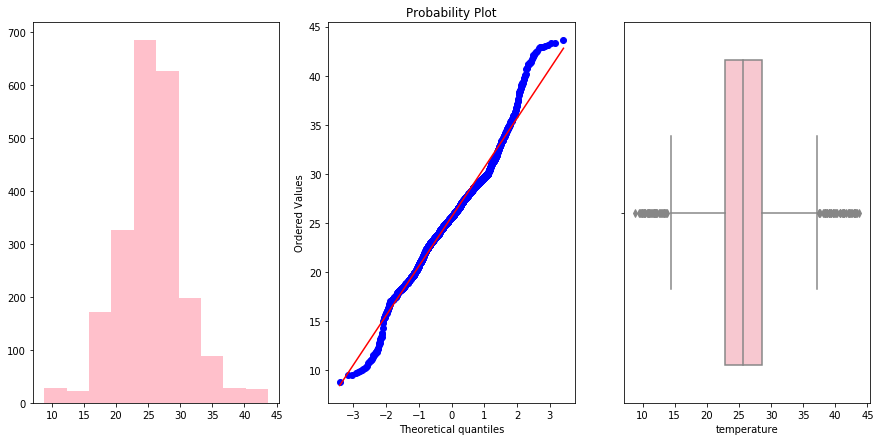

------------------------------------------------------------
 Statistical plots for : humidity is shown ↓


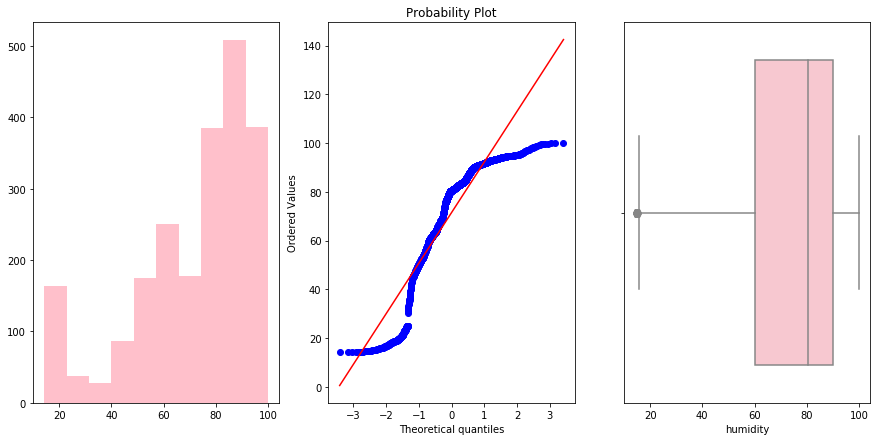

------------------------------------------------------------
 Statistical plots for : ph is shown ↓


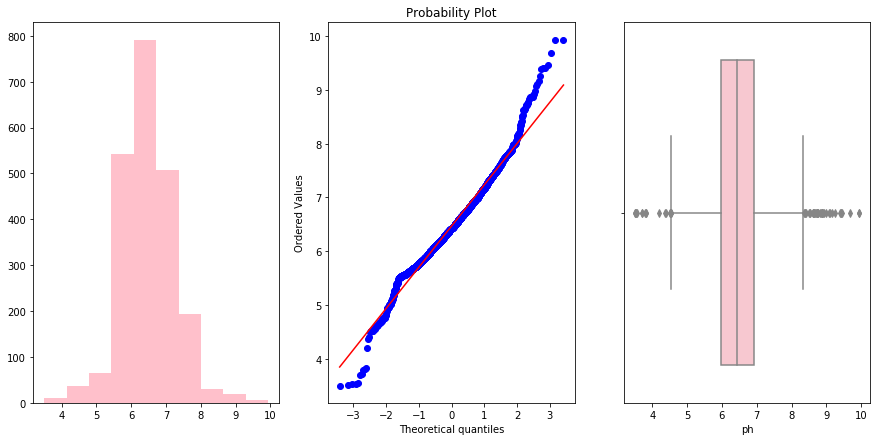

------------------------------------------------------------
 Statistical plots for : rainfall is shown ↓


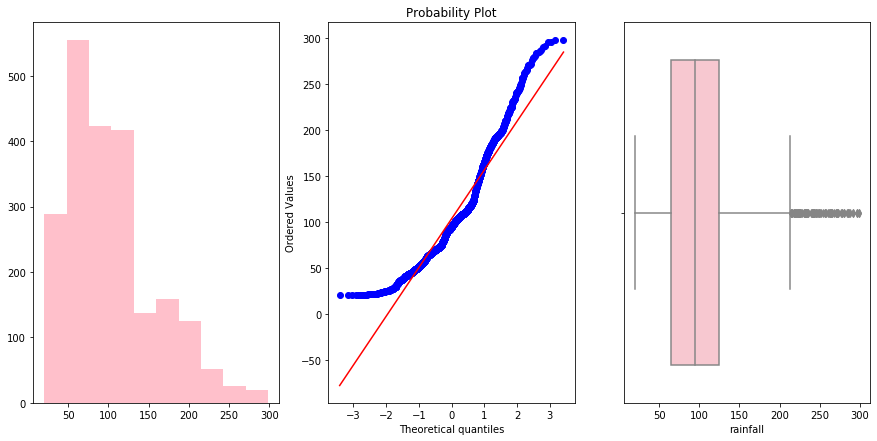

------------------------------------------------------------


In [13]:
for i in df.columns[:-1]:
    print(f' Statistical plots for : {i} is shown ↓')
    visualise(df,i)
    print("-"*60)

## Outlier Removal

### First Lets detect the outliers as shown ↓

**We will be using the gaussian trainsformation technique which says if there are datapoints greater than "mean+{num} * std",then there is a possibilty that that particular datapoint will not fit in the gaussian distribution,so here i have choosen the num as 3,so my range is {lower,upper} = {mean-{3} * std,mean+{3} * std},if there are any datapoints beyond these ranges,then they must be removed,so we find there are couple of data points of that,inorder to remove these outilers,we will be using another method of `Quantiles` which is `Inter Quantile Range` which is a better approach!**

In [14]:
temp = df.copy()

In [15]:
upper_list = []
lower_list = []

for i in temp.columns[:-1]:
    upper_list.append(df[i].mean()+(df[i].std())*3)
    lower_list.append(df[i].mean()-(df[i].std())*3)
    

In [16]:
j = 0
for i in temp.columns[:-1]:
    dummy = temp[(temp[i]>upper_list[j])|(temp[i]<lower_list[j])];j+=1

In [17]:
dummy

,N,P,K,temperature,humidity,ph,rainfall,label
6,75,23,28,22.708838,82.639414,5.700806,271.324860,1
12,86,52,48,26.800796,80.886848,5.108682,284.436457,1
16,61,46,51,21.587118,82.788371,6.249051,276.655246,1
19,100,46,34,23.579436,83.587603,5.853932,291.298662,1
26,96,32,31,26.359272,84.044036,6.286500,271.358614,1
30,68,34,49,21.446540,84.943760,5.824709,272.201720,1
33,94,25,30,20.267076,81.638952,5.014507,270.441727,1
36,78,23,40,26.757542,81.177340,5.960370,272.299906,1
37,74,42,29,23.863305,83.152508,5.561399,285.249365,1
38,68,60,49,21.019447,82.952217,7.416245,298.401847,1


## Outlier Removal using IQR technique

In [18]:
def quantile(df,val):
    a = []
    df_upper_limit = df[val].quantile(0.75)
    df_lower_limit = df[val].quantile(0.25)
    iqr = df_upper_limit-df_lower_limit
    upper_limit = float(df_upper_limit+(iqr)*1.5)
    lower_limit = float(df_lower_limit-(iqr)*1.5)
    
    for i in df[val]:
        if i>upper_limit:
            i = np.NaN
            
        elif i<lower_limit:
            i = np.NaN
            
        else:
            i = i
            
        a.append(i)
        
    return a
            
    

In [19]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [20]:
temp = df.copy()
temp['N'] = quantile(temp,'N')
temp['P'] = quantile(temp,'P')
temp['K'] = quantile(temp,'K')
temp['temperature'] = quantile(temp,'temperature')
temp['humidity'] = quantile(temp,'humidity')
temp['ph'] = quantile(temp,'ph')
temp['rainfall'] = quantile(temp,'rainfall')
temp.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34.0,37.0,20.879744,82.002744,6.502985,202.935536,1
1,78,21.0,20.0,21.770462,80.319644,7.038096,NaN,1
2,92,31.0,34.0,23.004459,82.320763,7.840207,NaN,1
3,98,38.0,45.0,26.491096,80.158363,6.980401,NaN,1
4,79,53.0,43.0,20.130175,81.604873,7.628473,NaN,1


In [21]:
temp = temp.dropna()
temp.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [22]:
temp.shape

(1766, 8)

In [23]:
temp.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34.0,37.0,20.879744,82.002744,6.502985,202.935536,1
13,86,20.0,31.0,24.014976,82.056872,6.984354,185.277339,1
14,75,22.0,56.0,25.665852,80.663850,6.948020,209.586971,1
17,69,45.0,28.0,23.793920,80.418180,6.970860,206.261186,1
20,62,49.0,37.0,21.325042,80.474764,6.442475,185.497473,1


 Statistical plots for N is shown ↓


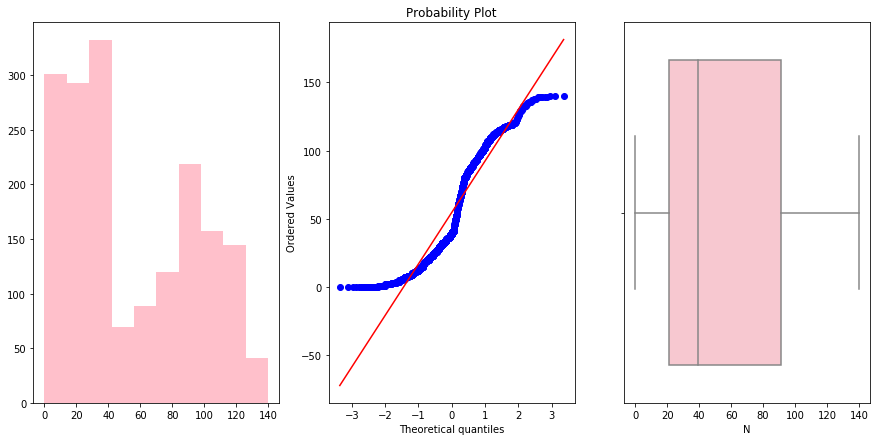

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for P is shown ↓


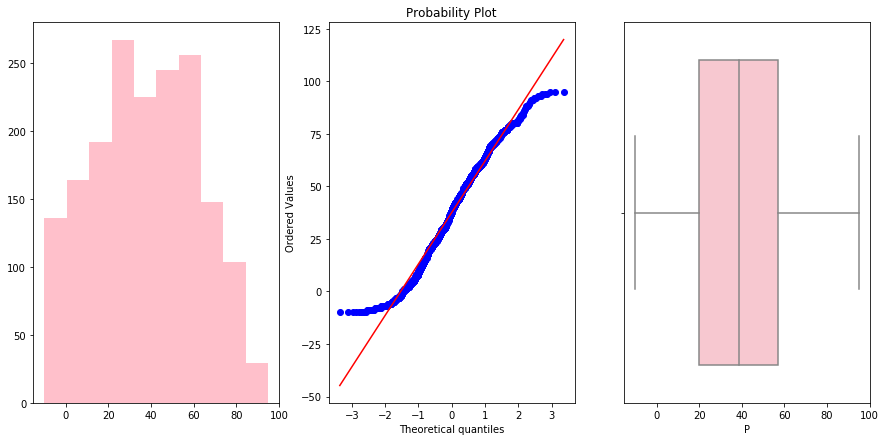

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for K is shown ↓


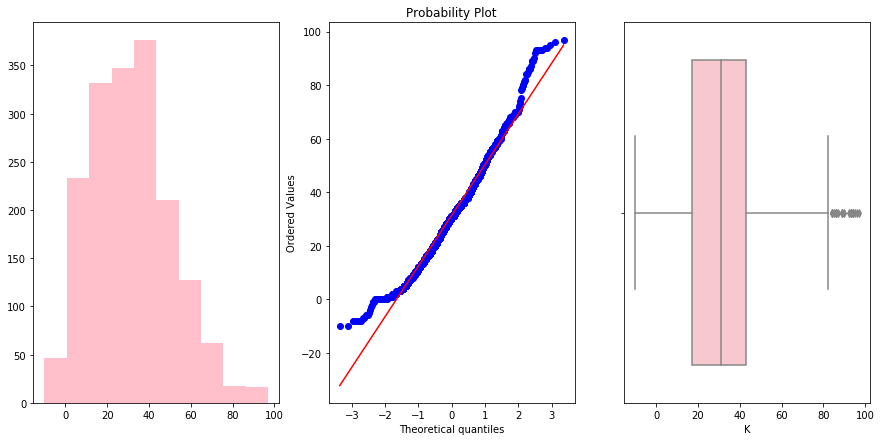

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for temperature is shown ↓


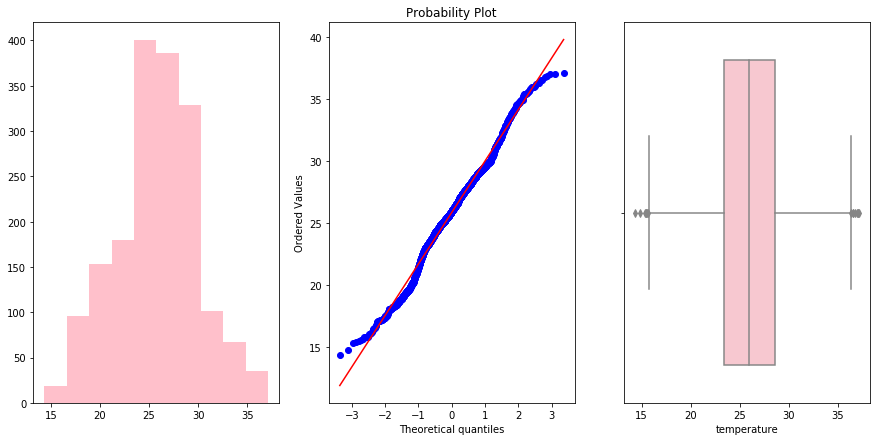

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for humidity is shown ↓


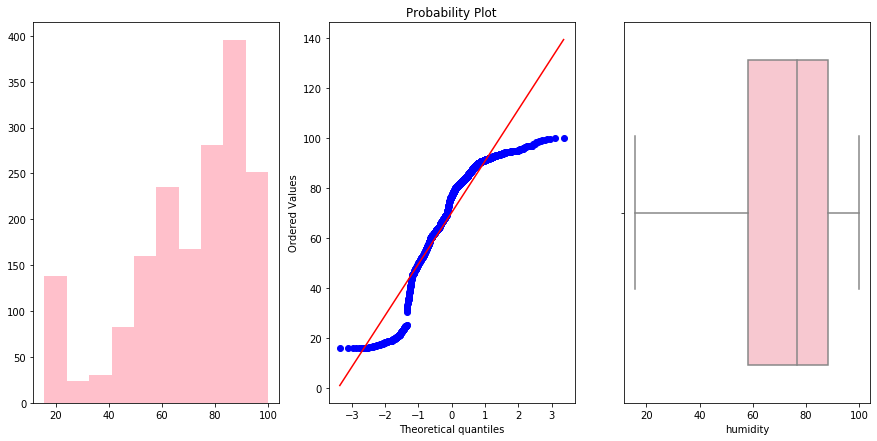

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for ph is shown ↓


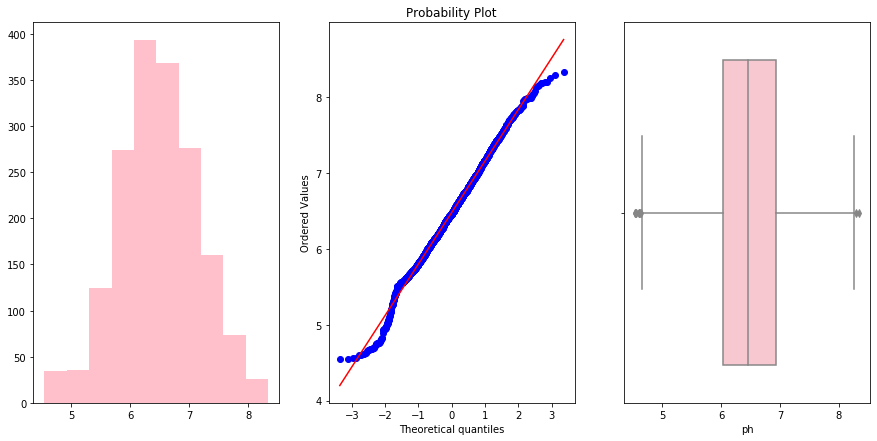

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for rainfall is shown ↓


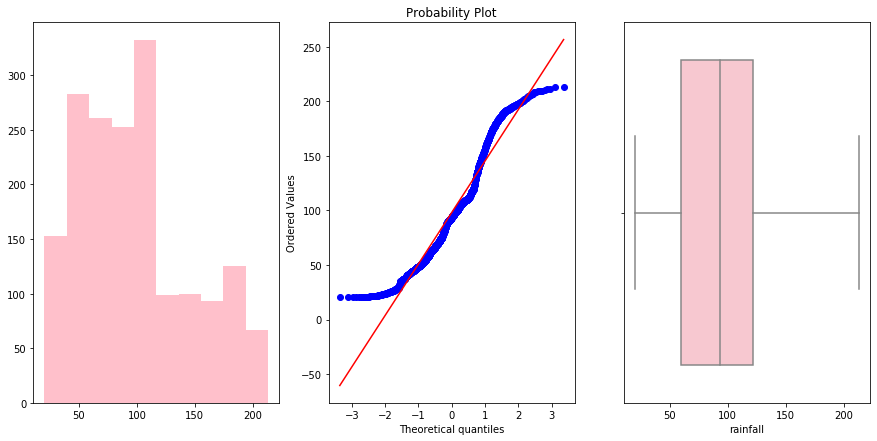

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>


In [24]:
for i in temp.columns[:-1]:
    print(f' Statistical plots for {i} is shown ↓')
    visualise(temp,i)
    print("=>"*50)

**Now we have to see which all values Are not properly normally distributed,well there are few like `N,humidity,rainfall`,as we can observe from the Q-Q plot,they're not that correctly fitted,lets try to fix them a bit**

((array([-3.41834386, -3.16906693, -3.03090347, ...,  3.03090347,
          3.16906693,  3.41834386]),
  array([ 0.        ,  0.        ,  0.        , ..., 15.52214998,
         15.52214998, 15.52214998])),
 (3.8370176242457106, 8.60900074072838, 0.9809808425996115))

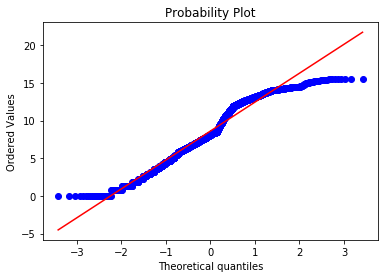

In [25]:
data = df.copy()
data['N'],params = stats.boxcox(data['N']+1)
stats.probplot(data['N'],dist='norm',plot=plt)

((array([-3.35808769, -3.10465012, -2.96393634, ...,  2.96393634,
          3.10465012,  3.35808769]),
  array([ 0.        ,  0.        ,  0.        , ..., 61.43841876,
         61.43841876, 61.43841876])),
 (16.513977488284294, 26.88812089792998, 0.9652035685212719))

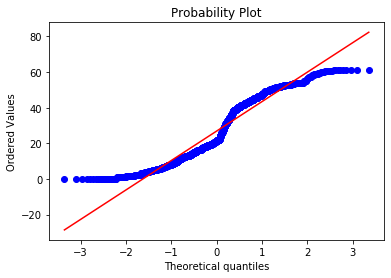

In [26]:
data = temp.copy()
data['N'] = data.N**(1/1.2)
stats.probplot(data['N'],dist='norm',plot=plt)

In [27]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [28]:
temp.head(2)

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34.0,37.0,20.879744,82.002744,6.502985,202.935536,1
13,86,20.0,31.0,24.014976,82.056872,6.984354,185.277339,1


In [29]:
test = temp['label']
train = temp.drop(['label'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size = 0.2)

In [30]:
sc = StandardScaler()
train_scaled = sc.fit_transform(X_train)
test_scaled = sc.transform(X_test)

 Statistical plots for N is shown ↓


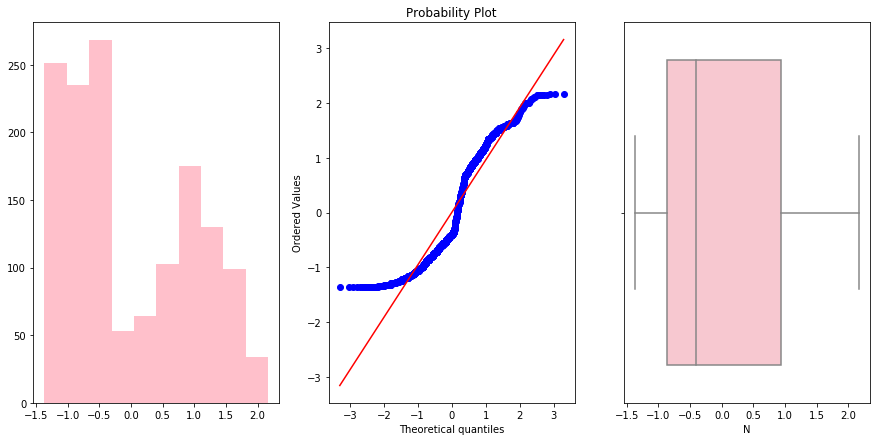

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for P is shown ↓


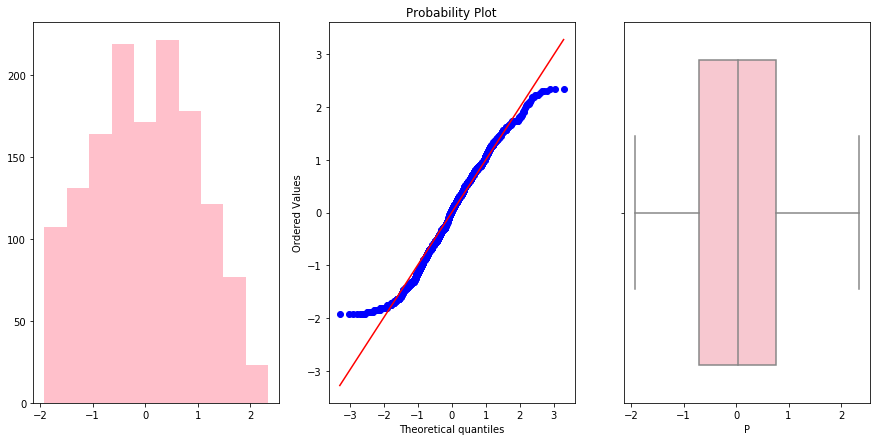

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for K is shown ↓


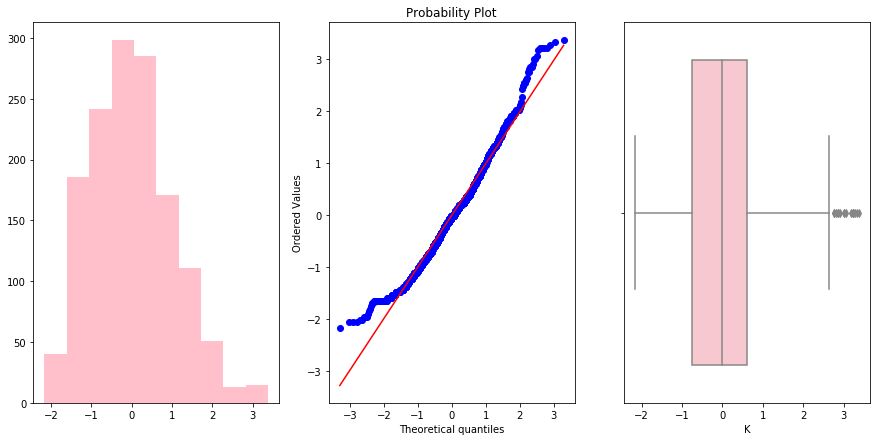

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for temperature is shown ↓


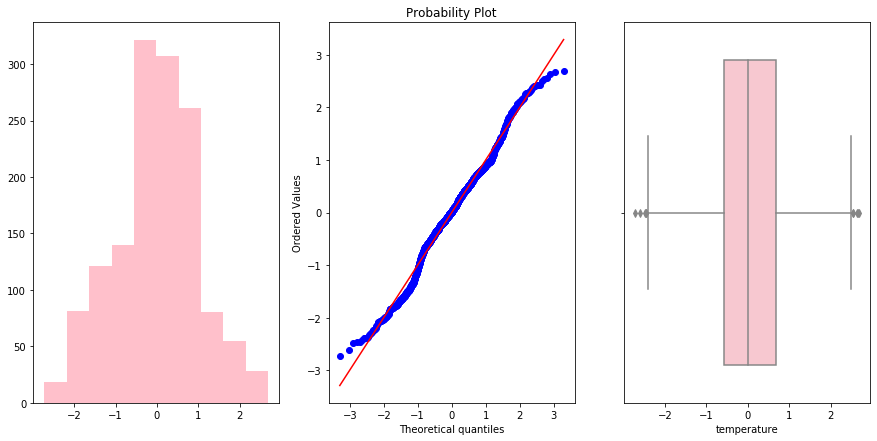

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for humidity is shown ↓


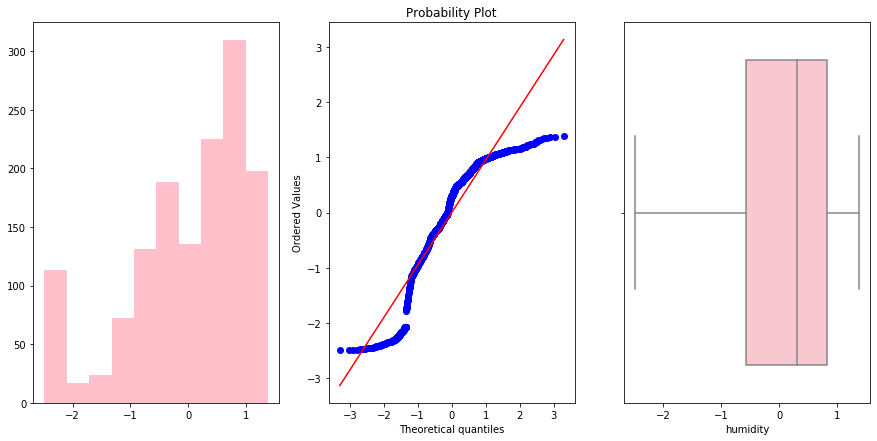

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for ph is shown ↓


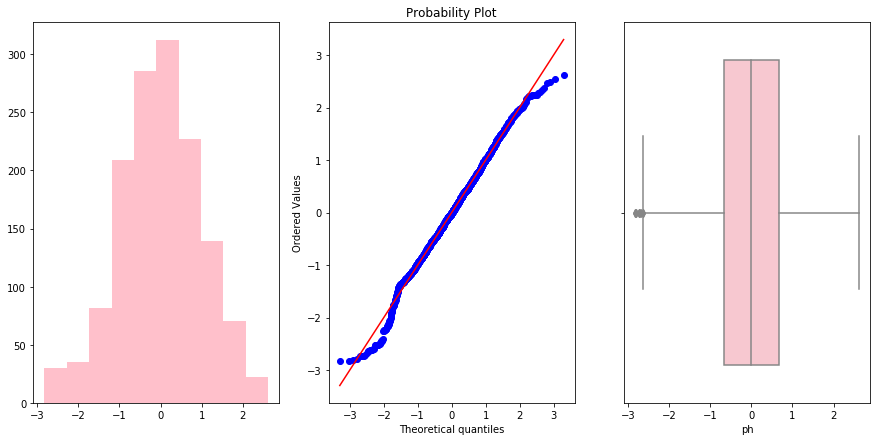

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for rainfall is shown ↓


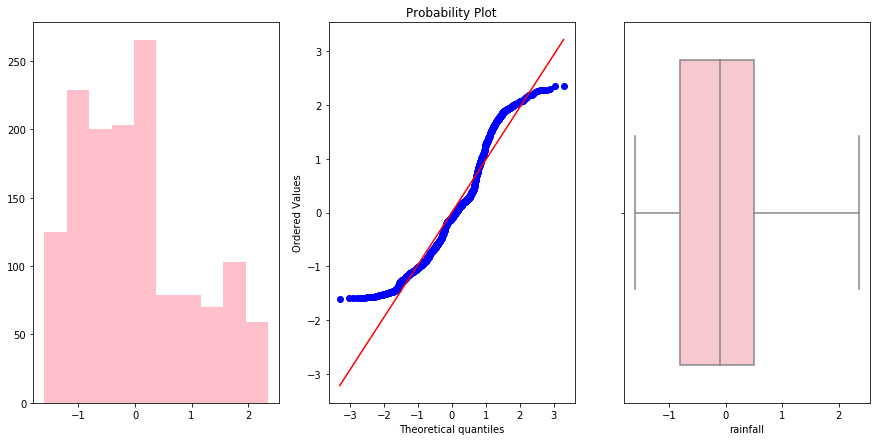

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>


In [31]:
scaled_df = pd.DataFrame(train_scaled,columns=train.columns)
for i in scaled_df.columns:
    print(f' Statistical plots for {i} is shown ↓')
    visualise(scaled_df,i)
    print("=>"*50)

In [32]:
scaled_df.head()

,N,P,K,temperature,humidity,ph,rainfall
0,-0.509056,-0.581296,-1.480637,-1.928089,1.123398,0.335045,0.197845
1,0.954920,-0.500074,1.447311,-0.581530,0.629203,-1.670335,1.845073
2,0.248173,-0.134575,0.401615,-0.406016,0.490406,-0.415838,1.608224
3,-1.367249,0.555814,0.087907,-0.470440,-0.091539,0.434065,-1.055908
4,-0.786706,-1.799628,-0.434941,0.818420,1.158055,-1.363699,1.770221


In [33]:
mm = MinMaxScaler()
train_mm = mm.fit_transform(X_train)
test_mm = mm.transform(X_test)

 Statistical plots for N is shown ↓


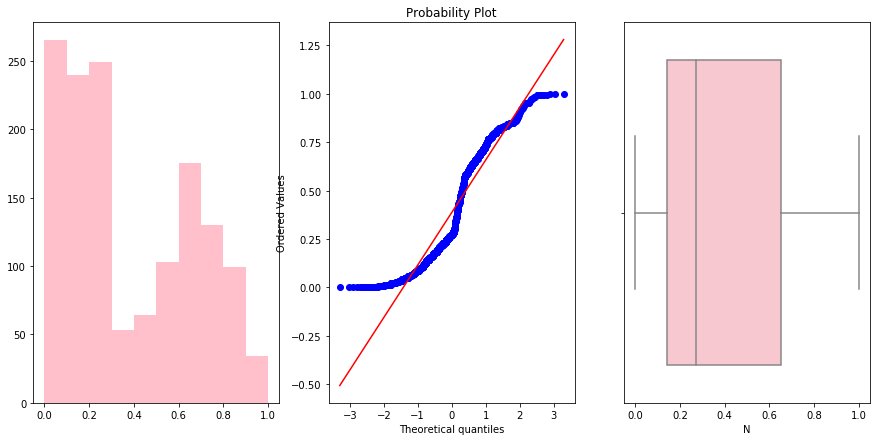

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for P is shown ↓


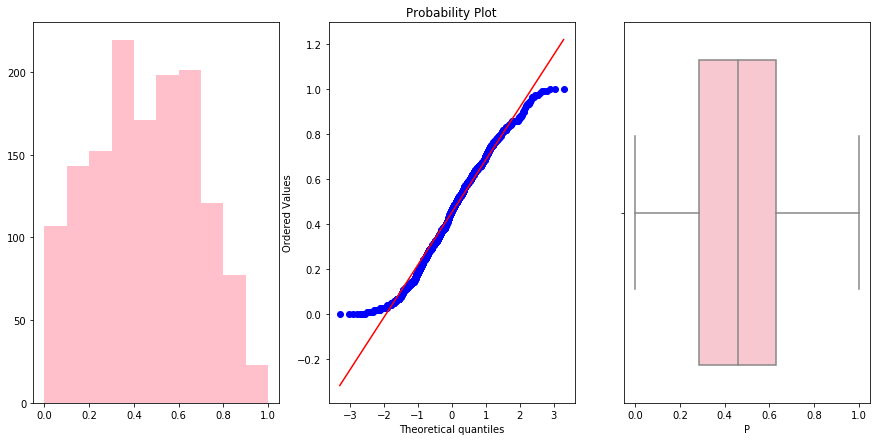

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for K is shown ↓


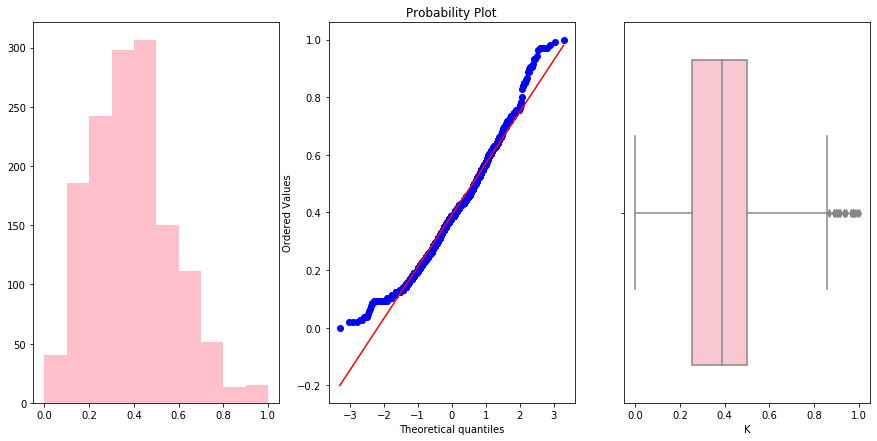

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for temperature is shown ↓


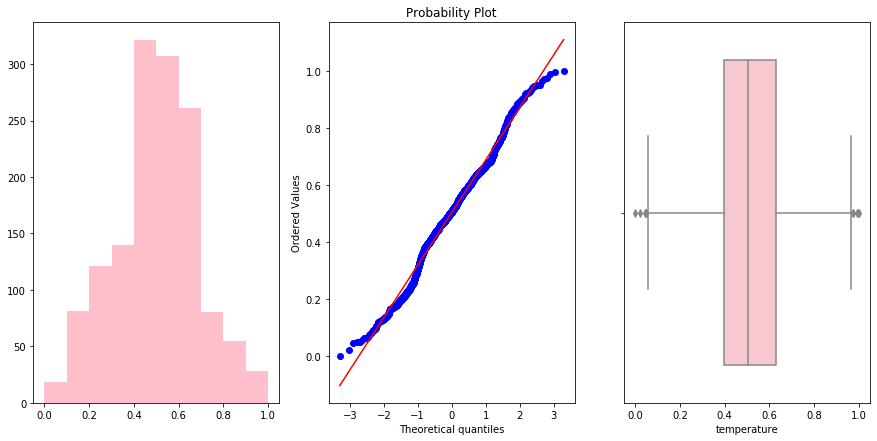

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for humidity is shown ↓


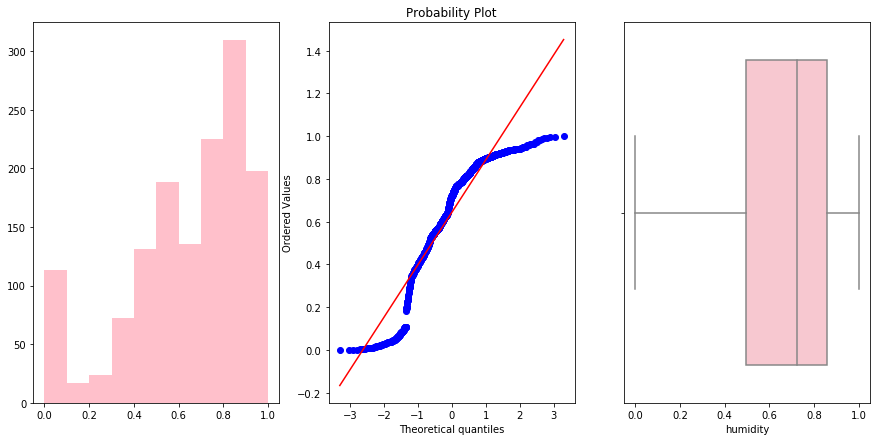

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for ph is shown ↓


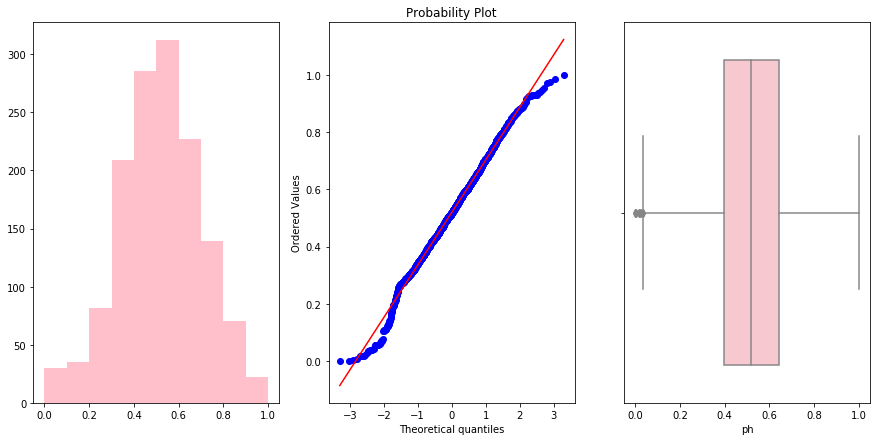

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
 Statistical plots for rainfall is shown ↓


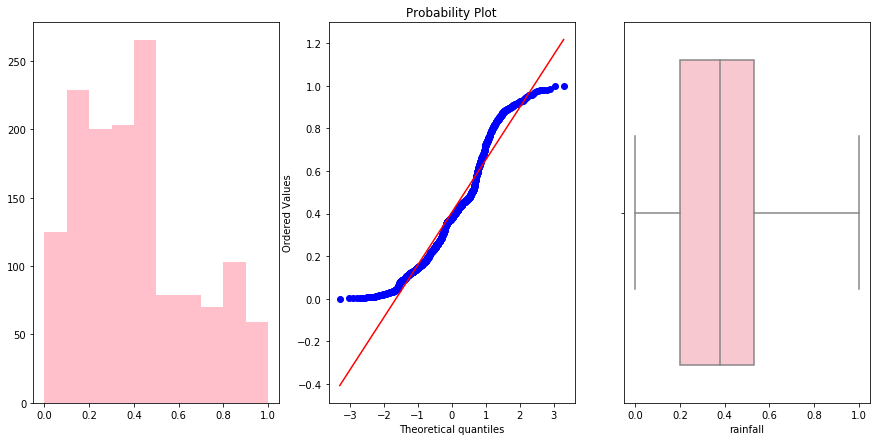

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>


In [34]:
scaled_mm = pd.DataFrame(train_mm,columns=train.columns)
for i in scaled_mm.columns:
    print(f' Statistical plots for {i} is shown ↓')
    visualise(scaled_mm,i)
    print("=>"*50)

In [35]:
scaled_mm.head()

,N,P,K,temperature,humidity,ph,rainfall
0,0.242857,0.314286,0.122642,0.146604,0.933373,0.580401,0.454853
1,0.657143,0.333333,0.650943,0.395632,0.805565,0.212149,0.870862
2,0.457143,0.419048,0.462264,0.428091,0.769670,0.442515,0.811045
3,0.000000,0.580952,0.405660,0.416177,0.619170,0.598584,0.138217
4,0.164286,0.028571,0.311321,0.654535,0.942335,0.268457,0.851958


C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


((array([-3.29576125, -3.03787488, -2.89442031, ...,  2.89442031,
          3.03787488,  3.29576125]),
  array([-4.47713939, -4.47713939, -4.47713939, ...,         nan,
                 nan,         nan])),
 (nan, nan, nan))

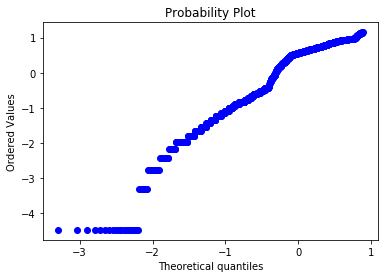

In [36]:
dum = scaled_df.copy()
dum['N'] = np.log(dum['N']+1)
stats.probplot(dum['N'],dist = 'norm',plot=plt)

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


((array([-3.29576125, -3.03787488, -2.89442031, ...,  2.89442031,
          3.03787488,  3.29576125]),
  array([-6.69709987, -5.83836777, -4.27813415, ...,         nan,
                 nan,         nan])),
 (nan, nan, nan))

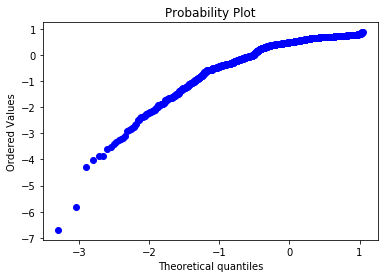

In [37]:
dum = scaled_df.copy()
dum['humidity'] = np.log(dum['humidity']+1)
stats.probplot(dum['humidity'],dist = 'norm',plot=plt)

In [38]:
X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.fit_transform(X_test)

### ML ALGO 

In [39]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn import tree

In [40]:
X_train_df = pd.DataFrame(X_train_scaled,columns=train.columns)
X_train_df.head()

,N,P,K,temperature,humidity,ph,rainfall
0,0.242857,0.314286,0.122642,0.146604,0.933373,0.580401,0.454853
1,0.657143,0.333333,0.650943,0.395632,0.805565,0.212149,0.870862
2,0.457143,0.419048,0.462264,0.428091,0.769670,0.442515,0.811045
3,0.000000,0.580952,0.405660,0.416177,0.619170,0.598584,0.138217
4,0.164286,0.028571,0.311321,0.654535,0.942335,0.268457,0.851958


In [45]:
X_train_scaled

array([[0.24285714, 0.31428571, 0.12264151, ..., 0.93337254, 0.58040112,
        0.45485324],
       [0.65714286, 0.33333333, 0.6509434 , ..., 0.80556548, 0.21214876,
        0.87086153],
       [0.45714286, 0.41904762, 0.46226415, ..., 0.76967018, 0.44251482,
        0.811045  ],
       ...,
       [0.66428571, 0.39047619, 0.27358491, ..., 0.41455455, 0.65712493,
        0.64088845],
       [0.82142857, 0.68571429, 0.56603774, ..., 0.78738263, 0.50939   ,
        0.36828063],
       [0.58571429, 0.37142857, 0.55660377, ..., 0.8263881 , 0.52999144,
        0.1780546 ]])

[Text(388.1472527472527, 473.95125, 'rainfall <= 30.393\ngini = 0.947\nsamples = 1412\nvalue = [29, 75, 45, 81, 83, 49, 76, 79, 86, 81, 75, 82\n78, 80, 65, 39, 66, 83, 81, 79]'),
 Text(368.5252747252747, 443.37375000000003, 'gini = 0.0\nsamples = 80\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80\n0, 0, 0, 0, 0, 0]'),
 Text(407.7692307692307, 443.37375000000003, 'N <= 60.5\ngini = 0.944\nsamples = 1332\nvalue = [29, 75, 45, 81, 83, 49, 76, 79, 86, 81, 75, 82\n78, 0, 65, 39, 66, 83, 81, 79]'),
 Text(225.65274725274722, 412.79625, 'humidity <= 74.998\ngini = 0.911\nsamples = 822\nvalue = [0, 0, 45, 81, 83, 49, 76, 79, 86, 81, 0, 82, 0\n0, 65, 28, 66, 0, 1, 0]'),
 Text(103.0153846153846, 382.21875, 'humidity <= 27.978\ngini = 0.85\nsamples = 505\nvalue = [0, 0, 45, 81, 83, 49, 0, 79, 86, 0, 0, 82, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(39.24395604395604, 351.64125, 'K <= 49.5\ngini = 0.459\nsamples = 126\nvalue = [0, 0, 45, 81, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(19.621

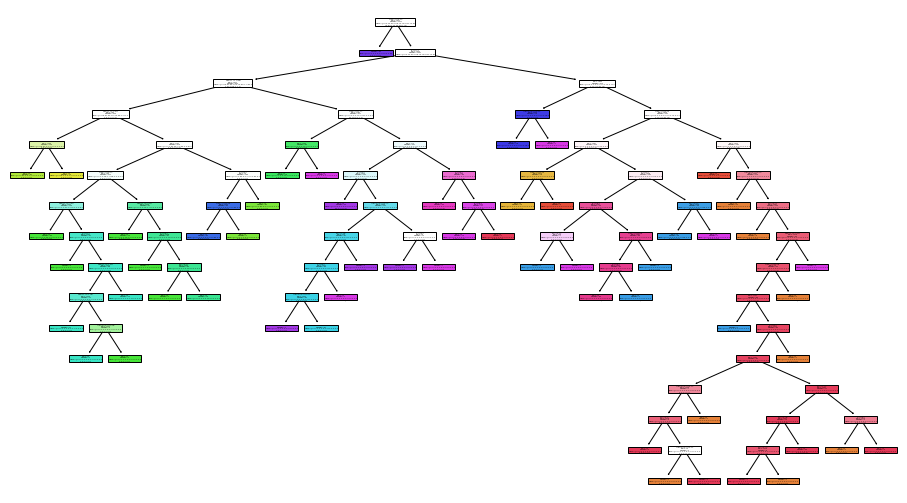

In [47]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns)

In [48]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.        , 0.00059018, 0.00068982, 0.00072814, 0.00092283,
       0.00126963, 0.00132245, 0.00133311, 0.00138146, 0.00139083,
       0.0013959 , 0.0013985 , 0.00139937, 0.00139957, 0.00242817,
       0.00270149, 0.00392455, 0.00408586, 0.00474413, 0.00495751,
       0.00521221, 0.00538244, 0.0060393 , 0.00647757, 0.00800323,
       0.00991705, 0.01111391, 0.01199287, 0.01808735, 0.02994992,
       0.03510287, 0.04097531, 0.04228609, 0.04616283, 0.04708291,
       0.04976004, 0.05021483, 0.0507796 , 0.05325992, 0.05641569])

In [49]:
alpha_list = []
for i in ccp_alpha:
    clf = DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    clf.fit(X_train,y_train)
    alpha_list.append(clf)


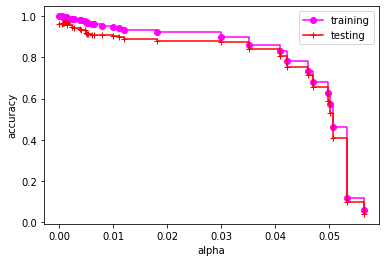

In [50]:
train_score = [clf.score(X_train,y_train) for clf in alpha_list]
test_score =  [clf.score(X_test,y_test) for clf in alpha_list]

plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,train_score,marker = 'o',label = 'training',color = 'magenta',drawstyle = 'steps-post')
plt.plot(ccp_alpha,test_score,marker = '+',label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

[Text(390.59999999999997, 454.2942857142857, 'rainfall <= 30.393\ngini = 0.947\nsamples = 1412\nvalue = [29, 75, 45, 81, 83, 49, 76, 79, 86, 81, 75, 82\n78, 80, 65, 39, 66, 83, 81, 79]'),
 Text(334.79999999999995, 384.40285714285716, 'gini = 0.0\nsamples = 80\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80\n0, 0, 0, 0, 0, 0]'),
 Text(446.4, 384.40285714285716, 'N <= 60.5\ngini = 0.944\nsamples = 1332\nvalue = [29, 75, 45, 81, 83, 49, 76, 79, 86, 81, 75, 82\n78, 0, 65, 39, 66, 83, 81, 79]'),
 Text(279.0, 314.51142857142855, 'humidity <= 74.998\ngini = 0.911\nsamples = 822\nvalue = [0, 0, 45, 81, 83, 49, 76, 79, 86, 81, 0, 82, 0\n0, 65, 28, 66, 0, 1, 0]'),
 Text(167.39999999999998, 244.62, 'humidity <= 27.978\ngini = 0.85\nsamples = 505\nvalue = [0, 0, 45, 81, 83, 49, 0, 79, 86, 0, 0, 82, 0\n0, 0, 0, 0, 0, 0, 0]'),
 Text(111.6, 174.7285714285714, 'gini = 0.459\nsamples = 126\nvalue = [0, 0, 45, 81, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(223.2, 174.7285714285714, 'ra

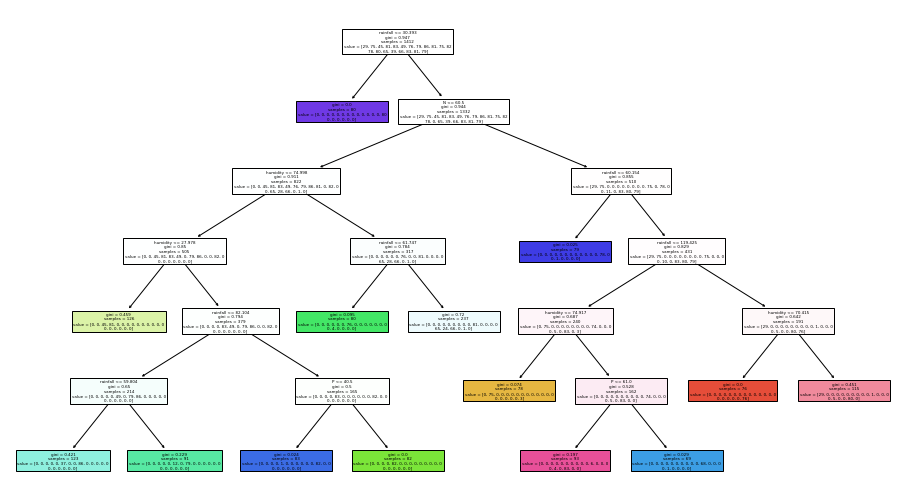

In [55]:
clf = DecisionTreeClassifier(random_state=0,ccp_alpha=0.045)
clf.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(clf,filled=True,feature_names=train.columns)

In [56]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.030,0.035,0.040,0.045,0.050],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.030,0.035,0.040,0.045,0.050],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [62]:
scores = []
for model_name,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions= mp['params'],cv = 5,n_jobs=-1,n_iter = 10,scoring='accuracy',
                            verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   38.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:    2.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished
C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=139).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [63]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_estimator','best_score'])
scores_df

,model_name,best_estimator,best_score
0,RandomForest,"(DecisionTreeClassifier(ccp_alpha=0.03, max_de...",0.897321
1,logistic,"LogisticRegression(C=0.75, max_iter=194, multi...",0.895875
2,D-tree,"DecisionTreeClassifier(ccp_alpha=0.035, max_fe...",0.586482
3,SVM,"SVC(C=0.5, kernel='poly', max_iter=139, tol=1e...",0.956793


In [64]:
for i in scores_df['best_estimator']:
    print(i)

RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=12,
                       min_samples_split=5, n_estimators=800)
LogisticRegression(C=0.75, max_iter=194, multi_class='ovr', penalty='l1',
                   solver='liblinear')
DecisionTreeClassifier(ccp_alpha=0.035, max_features='auto',
                       min_samples_leaf=12, min_samples_split=5)
SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)


In [71]:
rf = RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=12,
                       min_samples_split=5, n_estimators=800)

lr = LogisticRegression(C=0.75, max_iter=194, multi_class='ovr', penalty='l1',
                   solver='liblinear')

svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)

rf_val = cross_val_score(estimator=rf,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)
lr_val = cross_val_score(estimator = lr,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)
svc_val = cross_val_score(estimator=svc,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)

In [72]:
score_list = [rf_val,lr_val,svc_val]
model_name = ['rf','lr','svc']
for i,j in zip(score_list,model_name):
    print(f' Model : {j} gave {i.mean()} accuracy')

 Model : rf gave 0.894486921529175 accuracy
 Model : lr gave 0.8888329979879275 accuracy
 Model : svc gave 0.9638832997987927 accuracy


In [67]:
from sklearn import metrics

In [73]:
svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)
svc.fit(X_train_scaled,y_train)
svc.score(X_train_scaled,y_train)

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=139).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.9851274787535411

In [77]:
rf = RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=12,
                       min_samples_split=5, n_estimators=800)

rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.896600566572238

In [78]:
svc = SVC(C=0.5, kernel='poly', max_iter=139, tol=1e-10)
svc.fit(X_train,y_train)
svc.score(X_train,y_train)

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=139).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.9645892351274787

In [80]:
svc.score(X_test,y_test)

0.96045197740113

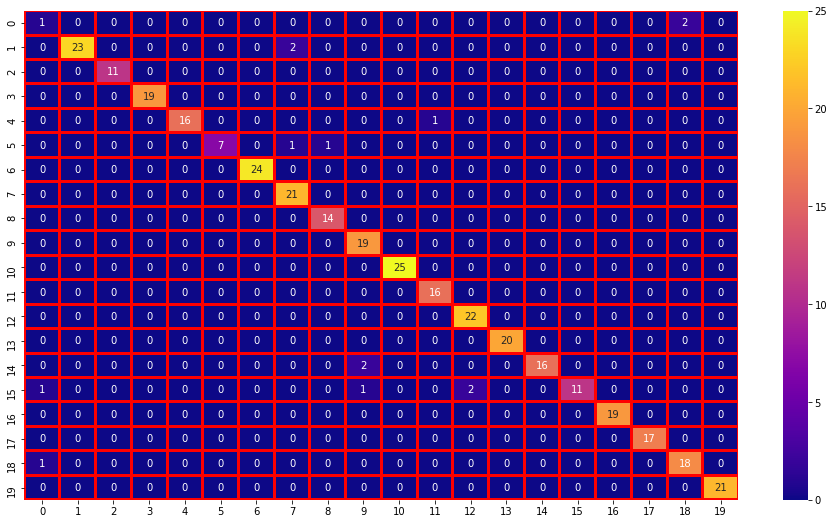

In [81]:
y_pred = svc.predict(X_test)
cn = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(16,9))
sn.heatmap(cn,annot=True,linecolor='red',linewidths=2,cmap='plasma')

In [82]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       1.00      0.92      0.96        25
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        19
           5       1.00      0.94      0.97        17
           6       1.00      0.78      0.88         9
           7       1.00      1.00      1.00        24
           8       0.88      1.00      0.93        21
           9       0.93      1.00      0.97        14
          10       0.86      1.00      0.93        19
          11       1.00      1.00      1.00        25
          12       0.94      1.00      0.97        16
          14       0.92      1.00      0.96        22
          15       1.00      1.00      1.00        20
          17       1.00      0.89      0.94        18
          18       1.00      0.73      0.85        15
          19       1.00      1.00      1.00        19
          20       1.00    

In [87]:
train.shape,temp.shape

((1766, 7), (1766, 8))

In [88]:
train = np.array(train)
predict_list = []
for i in range(0,len(train)):
    predict_list.append(svc.predict([train[i]]))

In [91]:
predict_list = np.array(predict_list)

In [92]:
temp.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,34.0,37.0,20.879744,82.002744,6.502985,202.935536,1
13,86,20.0,31.0,24.014976,82.056872,6.984354,185.277339,1
14,75,22.0,56.0,25.665852,80.663850,6.948020,209.586971,1
17,69,45.0,28.0,23.793920,80.418180,6.970860,206.261186,1
20,62,49.0,37.0,21.325042,80.474764,6.442475,185.497473,1


In [93]:
original_labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
labels_map_new = {i+1:original_labels[i] for i in range(len(original_labels))}
labels_map_new

{1: 'rice',
 2: 'maize',
 3: 'chickpea',
 4: 'kidneybeans',
 5: 'pigeonpeas',
 6: 'mothbeans',
 7: 'mungbean',
 8: 'blackgram',
 9: 'lentil',
 10: 'pomegranate',
 11: 'banana',
 12: 'mango',
 13: 'grapes',
 14: 'watermelon',
 15: 'muskmelon',
 16: 'apple',
 17: 'orange',
 18: 'papaya',
 19: 'coconut',
 20: 'cotton',
 21: 'jute',
 22: 'coffee'}

In [96]:
temp['Original_labels'] = temp['label'].map(labels_map_new)
temp.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Original_labels
0,79,34.0,37.0,20.879744,82.002744,6.502985,202.935536,1,rice
13,86,20.0,31.0,24.014976,82.056872,6.984354,185.277339,1,rice
14,75,22.0,56.0,25.665852,80.663850,6.948020,209.586971,1,rice
17,69,45.0,28.0,23.793920,80.418180,6.970860,206.261186,1,rice
20,62,49.0,37.0,21.325042,80.474764,6.442475,185.497473,1,rice


In [97]:
temp['SVM_pred'] = predict_list

In [98]:
temp['Predicted_labels'] = temp['SVM_pred'].map(labels_map_new)
temp.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Original_labels,SVM_pred,Predicted_labels
0,79,34.0,37.0,20.879744,82.002744,6.502985,202.935536,1,rice,1,rice
13,86,20.0,31.0,24.014976,82.056872,6.984354,185.277339,1,rice,21,jute
14,75,22.0,56.0,25.665852,80.663850,6.948020,209.586971,1,rice,1,rice
17,69,45.0,28.0,23.793920,80.418180,6.970860,206.261186,1,rice,1,rice
20,62,49.0,37.0,21.325042,80.474764,6.442475,185.497473,1,rice,21,jute


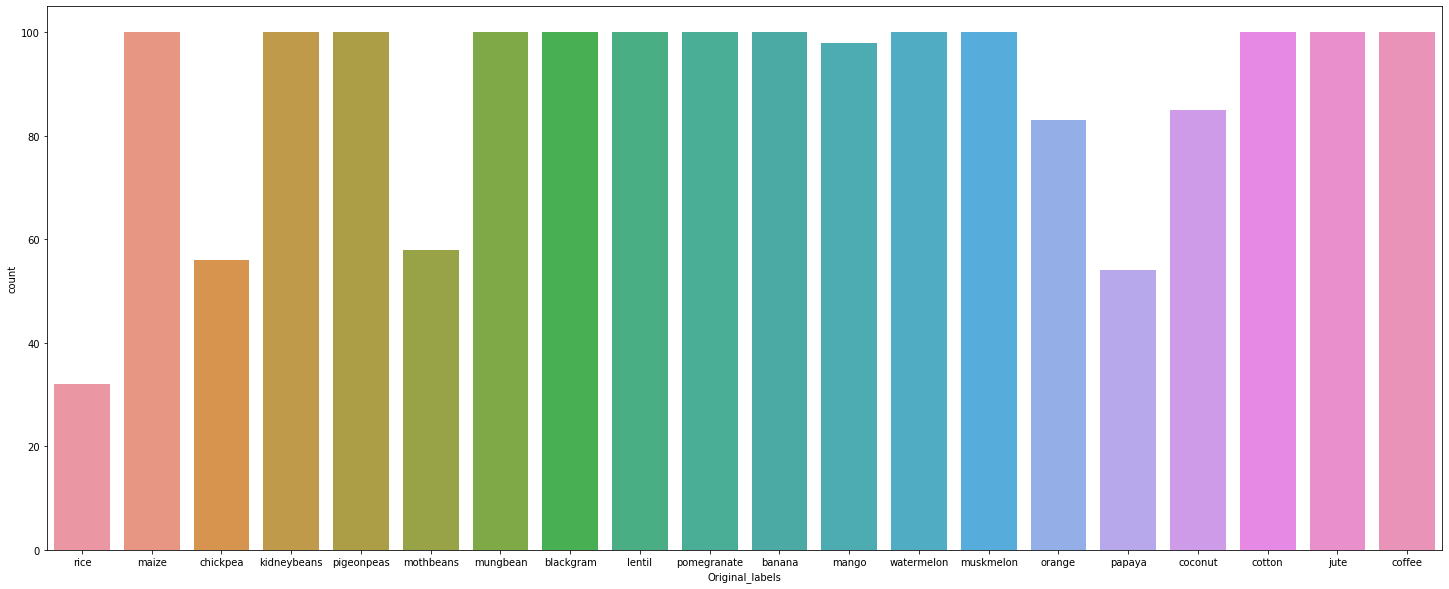

In [100]:
plt.figure(figsize=(25,10))
sn.countplot(data=temp,x = 'Original_labels')


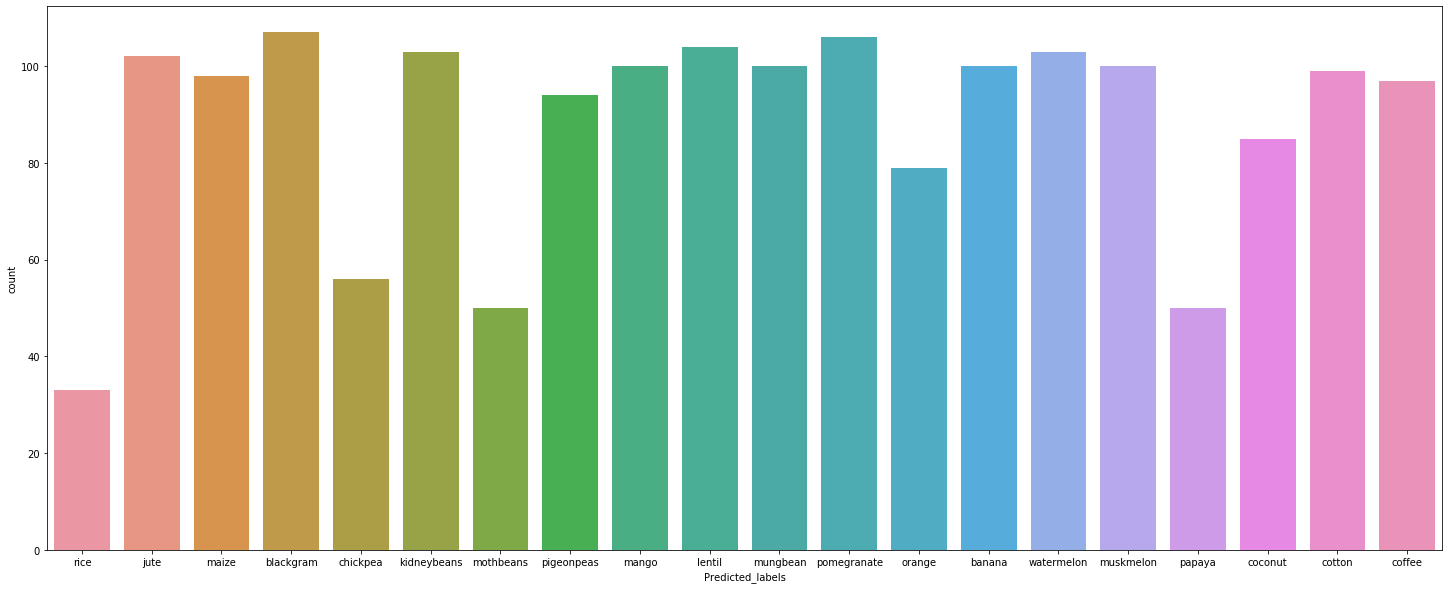

In [101]:
plt.figure(figsize=(25,10))
sn.countplot(data = temp,x = 'Predicted_labels')

In [102]:
temp['Predicted_labels'].value_counts()

blackgram      107
pomegranate    106
lentil         104
kidneybeans    103
watermelon     103
jute           102
mango          100
mungbean       100
banana         100
muskmelon      100
cotton          99
maize           98
coffee          97
pigeonpeas      94
coconut         85
orange          79
chickpea        56
papaya          50
mothbeans       50
rice            33
Name: Predicted_labels, dtype: int64

In [103]:
temp['Original_labels'].value_counts()

maize          100
muskmelon      100
pomegranate    100
blackgram      100
lentil         100
kidneybeans    100
mungbean       100
pigeonpeas     100
banana         100
watermelon     100
coffee         100
cotton         100
jute           100
mango           98
coconut         85
orange          83
mothbeans       58
chickpea        56
papaya          54
rice            32
Name: Original_labels, dtype: int64

In [105]:
a = temp[temp['Original_labels']!=temp['Predicted_labels']].style.background_gradient('plasma')
a

,N,P,K,temperature,humidity,ph,rainfall,label,Original_labels,SVM_pred,Predicted_labels
13,86,20.000000,31.000000,24.014976,82.056872,6.984354,185.277339,1,rice,21,jute
20,62,49.000000,37.000000,21.325042,80.474764,6.442475,185.497473,1,rice,21,jute
45,84,49.000000,31.000000,24.897282,80.525861,6.134287,183.679321,1,rice,21,jute
65,99,37.000000,60.000000,24.458021,82.748356,6.738652,182.561632,1,rice,21,jute
73,82,45.000000,26.000000,21.323763,83.003205,7.283737,192.319754,1,rice,21,jute
77,88,32.000000,32.000000,24.889212,81.979271,5.005307,185.946143,1,rice,21,jute
80,92,40.000000,28.000000,26.088679,80.379799,5.706943,182.904350,1,rice,21,jute
87,91,26.000000,60.000000,25.485920,81.406335,5.935344,182.654936,1,rice,21,jute
98,85,59.000000,26.000000,26.543481,84.673536,7.072656,183.622266,1,rice,21,jute
185,64,51.000000,11.000000,25.082397,65.921958,6.455117,62.491908,2,maize,8,blackgram


In [118]:
tru = temp['Original_labels'].values
tru = list(tru.flatten())
predict = temp['Predicted_labels'].values
predict = list(predict.flatten())

In [124]:
count = 0
for i,j in zip(tru,predict):
    if i!=j:
        
        count+=1

In [128]:
print(f'Total Values after Preprocessing : {temp.shape[0]}\nMisclassified values are : {temp.shape[0]-count}')

Total Values after Preprocessing : 1766
Misclassified values are : 1702


In [136]:
# 21st label is jute!

data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = svc.predict(data)
pred = prediction[0]
print(labels_map_new[pred])


data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = svc.predict(data)
pred = prediction[0]
print(labels_map_new[pred])

jute
coffee


## Saving the Model

In [131]:
import pickle
svm_model_pkl = open('crop_classification_model.pkl', 'wb')
pickle.dump(svc, svm_model_pkl)
svm_model_pkl.close()

In [132]:
file = open('cropmodel2.pkl','wb')
pickle.dump(svc,file)
file.close()